In [296]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [297]:
base_dir = 'images'
files = os.listdir(base_dir)

In [298]:
train_ratio = 0.8
validation_ratio = 0.2
total_files = len(files)
train_split = int(train_ratio * total_files)

In [299]:
train_files = files[:train_split]
validation_files = files[train_split:]

In [300]:
#@title AUGMENTATION
datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest',
    validation_split=0.4
)

In [301]:
#@title DATA GENERATOR
target_size = (150, 150)
batch_size = 32

In [302]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    subset='training',
    class_mode='binary',
)

Found 120 images belonging to 2 classes.


In [303]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='binary',
)

Found 80 images belonging to 2 classes.


In [304]:
#@title MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_125 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_125 (MaxPool  (None, 74, 74, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_126 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_126 (MaxPool  (None, 36, 36, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_127 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_127 (MaxPool  (None, 17, 17, 128)     

In [305]:
#@title MODEL COMPILE & CALLBACKS
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [306]:
#@title TRAIN MODEL
model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/30
4/4 - 3s - loss: 0.7099 - accuracy: 0.5083 - val_loss: 0.6936 - val_accuracy: 0.4875 - 3s/epoch - 819ms/step
Epoch 2/30
4/4 - 2s - loss: 0.6913 - accuracy: 0.6000 - val_loss: 0.6931 - val_accuracy: 0.5500 - 2s/epoch - 439ms/step
Epoch 3/30
4/4 - 2s - loss: 0.6884 - accuracy: 0.6333 - val_loss: 0.6921 - val_accuracy: 0.6125 - 2s/epoch - 430ms/step
Epoch 4/30
4/4 - 2s - loss: 0.6795 - accuracy: 0.6167 - val_loss: 0.6923 - val_accuracy: 0.4625 - 2s/epoch - 435ms/step
Epoch 5/30
4/4 - 2s - loss: 0.6540 - accuracy: 0.6000 - val_loss: 0.7296 - val_accuracy: 0.5250 - 2s/epoch - 439ms/step
Epoch 6/30
4/4 - 2s - loss: 0.6207 - accuracy: 0.6333 - val_loss: 0.7087 - val_accuracy: 0.5250 - 2s/epoch - 458ms/step
Epoch 7/30
4/4 - 2s - loss: 0.5507 - accuracy: 0.7583 - val_loss: 0.8067 - val_accuracy: 0.5250 - 2s/epoch - 464ms/step
Epoch 8/30
4/4 - 2s - loss: 0.5085 - accuracy: 0.7583 - val_loss: 0.9285 - val_accuracy: 0.5625 - 2s/epoch - 450ms/step
Epoch 9/30
4/4 - 2s - loss: 0.4595 - acc

1/1 [==============================] - 0s 22ms/step
Prediction result:
Lions


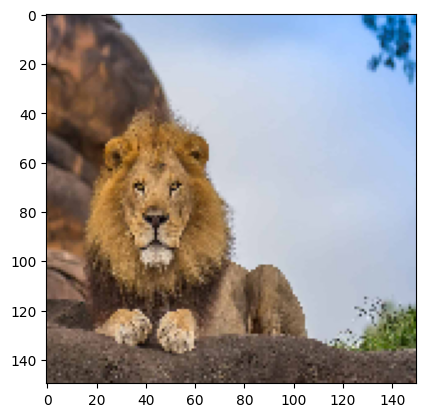

In [312]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming you have a trained model named 'model' loaded here

# Specify the path to the image you want to classify
path = 'l3.jpg'  # Change this to the actual path of your image

# Predicting the image
img = image.load_img(path, target_size=(150, 150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

# Assuming the model output is a probability between 0 and 1
threshold = 0.5  # You may need to adjust this threshold based on your model and problem

print("Prediction result:")
if classes[0, 0] >= threshold:
    print('Lions')
else:
    print('Cheetah')
